Importing the Dependencies

In [59]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

Data Collection and Analysis

In [60]:
#loading the datasets into pandas dataframe
diabetes_dataset = pd.read_csv(r'C:\Users\kenneth\OneDrive\Desktop\Disease Prediction\Disease-Prediction\datasets\diabetes_prediction_dataset.csv')

In [61]:
#first 5 rows of the dataset
diabetes_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [62]:
#last 5 rows of the dataset
diabetes_dataset.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [63]:
#knowing more about the dataset
diabetes_dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [64]:
#shape of the dataset
diabetes_dataset.shape

(100000, 9)

In [65]:
#how many diabetic and how many non diabetic features
diabetes_dataset['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [66]:
diabetes_dataset.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [67]:
# Filtering out certain smoking history values
diabetes_dataset = diabetes_dataset[diabetes_dataset['smoking_history'] != 'No Info']
diabetes_dataset = diabetes_dataset[diabetes_dataset['smoking_history'] != 'ever']
diabetes_dataset = diabetes_dataset[diabetes_dataset['smoking_history'] != 'not current']

In [68]:
# converting the categorical values to numeric values
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
from pandas.core.dtypes.common import is_numeric_dtype #used to check if the particular column's dtype is numeric
for column in diabetes_dataset.columns:
    if is_numeric_dtype(diabetes_dataset[column]):
        continue
    else:
        diabetes_dataset[column]=label.fit_transform(diabetes_dataset[column]) #converts the other dtype into numeric

In [69]:
#seperating the data and labels
X = diabetes_dataset.drop(columns = 'diabetes', axis = 1)
Y = diabetes_dataset['diabetes']

In [70]:
print(X)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                2  25.19   
2           1  28.0             0              0                2  27.32   
3           0  36.0             0              0                0  23.45   
4           1  76.0             1              1                0  20.14   
5           0  20.0             0              0                2  27.32   
...       ...   ...           ...            ...              ...    ...   
99992       0  26.0             0              0                2  34.34   
99993       0  40.0             0              0                2  40.69   
99997       1  66.0             0              0                1  27.83   
99998       0  24.0             0              0                2  35.42   
99999       0  57.0             0              0                0  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
2  

In [71]:
print(Y)

0        0
2        0
3        0
4        0
5        0
        ..
99992    0
99993    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 53733, dtype: int64


In [72]:
diabetes_dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Data Standardisation


In [73]:
diabetes_dataset['smoking_history'].value_counts()

smoking_history
2    35095
1     9352
0     9286
Name: count, dtype: int64

In [74]:
scaler = StandardScaler()

In [75]:
scaler.fit(X)
standardized_data = scaler.transform(X)

In [76]:
X = standardized_data

In [77]:
print(X)

[[-0.80187912  1.72767638 -0.33339192 ... -0.49309312  0.94719839
   0.00758285]
 [ 1.24648649 -0.93134693 -0.33339192 ... -0.16845313  0.12525384
   0.43450431]
 [-0.80187912 -0.52226642 -0.33339192 ... -0.75829198 -0.51403637
   0.36335073]
 ...
 [ 1.24648649  1.01178549 -0.33339192 ... -0.09072242  0.12525384
   0.36335073]
 [-0.80187912 -1.13588718 -0.33339192 ...  1.06609332 -1.42730809
  -0.94113151]
 [-0.80187912  0.55156992 -0.33339192 ... -0.91375339  0.94719839
  -1.1783101 ]]


In [78]:
print(Y)

0        0
2        0
3        0
4        0
5        0
        ..
99992    0
99993    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 53733, dtype: int64


Splitting the data into training and testing data

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y, random_state = 2)

In [80]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(42986, 8) (10747, 8) (42986,) (10747,)


Training the model

In [81]:
model = SVC(kernel = 'linear')
model.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [82]:
Y_pred = model.predict(X_test)
testing_prediction = accuracy_score(Y_test, Y_pred)
print("The accuracy score of the model using testing data is: ", testing_prediction)

The accuracy score of the model using testing data is:  0.9504978133432586


In [87]:
#testing the model with some data from the dataset
input_data = (0,59.0,0,0,1,33.86,5.7,85)

#changing the input_data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

#predicting the desired output
prediction = model.predict(std_data)

print(prediction)

[[-0.80187912  0.65384005 -0.33339192 -0.21688501 -0.62256009  0.82832882
   0.12525384 -1.2968994 ]]
[0]


c:\Users\kenneth\anaconda3\envs\tf2new\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [84]:
if prediction[0] == [0]:
    print("Not diabetic")
else:
    print("Diabetic")

Not diabetic


<Axes: >

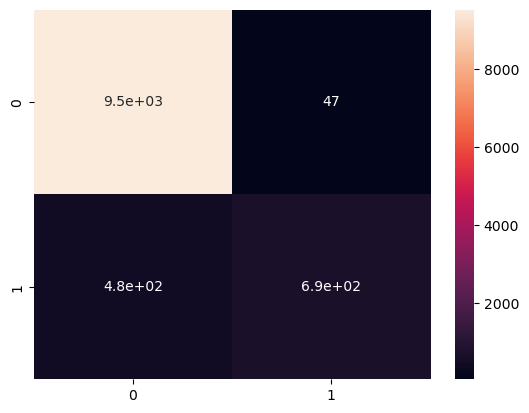

In [85]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, Y_pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot = True)

In [86]:
import pickle
filename = 'diabetes_prediction_model.sav'
pickle.dump(model, open(filename, 'wb'))